In [2]:
import pandas as pd               # manipulação de data frames no python
import numpy as np                # manipulação de numeros na notação científica
from matplotlib import pyplot as plt   # plots/gráficos
import seaborn as sns             # Visualização de gráficos
import plotly.express as px       # Gera Gráficos
from datetime import date, datetime, timedelta   # Manipalação de datas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score #
from sklearn.preprocessing import StandardScaler, LabelEncoder #
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_regression, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_absolute_error, balanced_accuracy_score
from yellowbrick.classifier import ConfusionMatrix
# Importação de classificadores:
from sklearn.naive_bayes import GaussianNB #
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression,LinearRegression,BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Leitura de planilha no Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Dataset:
## https://drive.google.com/drive/folders/1cRVuQr8XTnzwe0Go1TWrqzsuKWLIjNmO?usp=sharing
bd = pd.read_csv("/content/drive/My Drive/Pós Data Science/Trabalho de Conclusão de Curso/dataset_Estevan_Pazzetti/coleta_de_características_DB2.csv")
bd.info

<bound method DataFrame.info of      GRUPO SUBGRUPO  ... TRIGGERS_AUDLOG  INSTANCE_MEMORY
0        1       AA  ...             4.0        AUTOMATIC
1        1       AA  ...             4.0        AUTOMATIC
2        1       AA  ...             4.0        AUTOMATIC
3        1       AA  ...             4.0        AUTOMATIC
4        1       AA  ...             4.0        AUTOMATIC
...    ...      ...  ...             ...              ...
5662     1       AA  ...             0.0        AUTOMATIC
5663     1       AA  ...             4.0        AUTOMATIC
5664     1       AA  ...             0.0        AUTOMATIC
5665     1       AA  ...             0.0        AUTOMATIC
5666     1       AA  ...             0.0        AUTOMATIC

[5667 rows x 35 columns]>

In [5]:
bd.head(50)

,GRUPO,SUBGRUPO,DTHORACONSULTA,SPEED_CPU,CPU_LOAD_SHORT,LOAD_MEDIO_CPU,CPU_LOAD_LONG,USO_TOTAL_CPU,NR_CPU,OS_NAME,MEMORIA_TOTAL,MEMORIA_FREE,OS_FULL_VERSION,DB_NAME,QTD_CONEXAO,BUILD_BANCO_DB2,PROD_FIXPACK_NUM,INSTALLED_PROD,QTD_ERROS_ATUALIZACAO,ULTIMO_RUNSTATS,QTD_OBJETOS_INVALIDOS,DT_PACOTE_ANTIGO,PACOTES_INVALIDOS,BUILD_INST_DB2,BUFFERPOLLS_AUTO,MEMORIA_BD,DFT_QUERYOPT,LOGBUFSZ,DB_MEM_THRESH,SELF_TUNING_MEM,DATABASE_MEMORY,DFT_DEGREE,TAMANHO_DO_BANCO_GB,TRIGGERS_AUDLOG,INSTANCE_MEMORY
0,1,AA,2020-09-29 20:18:44,2400,3.540000,2.04,1.71,7.0,4,Linux,24112,5377,SUSE Linux Enterprise Server 12 SP3,DEVKOP,14,s181109,4.0,EXPC,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,s1811091400,0.0,928.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
1,1,AA,2020-09-30 23:09:03,2400,1.440000,1.38,1.38,14.0,4,Linux,24112,4673,SUSE Linux Enterprise Server 12 SP3,DEVKOP,14,s181109,4.0,EXPC,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,s1811091400,0.0,1014.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
2,1,AA,2020-09-30 23:35:46,2400,1.640000,1.79,2.00,11.0,4,Linux,24112,4498,SUSE Linux Enterprise Server 12 SP3,DEVKOP,14,s181109,4.0,EXPC,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,s1811091400,0.0,1181.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
3,1,AA,2020-09-30 23:39:59,2400,1.030000,0.65,0.43,51.0,2,Linux,6976,554,SUSE Linux Enterprise Server 12 SP3,DONGO,9,s141128,5.0,EXPC,2.0,2020-09-12,0.0,2020-09-16 15:49:57,1.0,s141128,2.0,2559.0,5.0,1024.0,100.0,ON (Active),AUTOMATIC,1.0,"37,53",4.0,AUTOMATIC
4,1,AA,2020-09-30 23:49:06,2400,1.060000,1.53,1.82,0.0,4,Linux,24112,4474,SUSE Linux Enterprise Server 12 SP3,DEVKOP,14,s181109,4.0,EXPC,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,s1811091400,0.0,1176.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
5,1,AA,2020-09-30 23:53:21,2400,1.050000,0.72,0.47,52.0,2,Linux,6976,485,SUSE Linux Enterprise Server 12 SP3,DONGO,9,s141128,5.0,EXPC,2.0,2020-09-12,0.0,2020-09-16 15:49:57,1.0,s141128,2.0,2555.0,5.0,1024.0,100.0,ON (Active),AUTOMATIC,1.0,"37,53",4.0,AUTOMATIC
6,1,AA,2020-09-30 23:58:54,2400,NaN,NaN,NaN,NaN,2,WIN32_NT,10240,3970,"Microsoft(R) Windows(R) Server 2012, 6.2.9200 ...",DECORTIN,9,s141128,5.0,EXPC,0.0,2020-01-30,0.0,2020-08-25 8:50:38,0.0,s141128,0.0,1848.0,5.0,4096.0,10.0,ON (Active),AUTOMATIC,-1.0,"7,91",0.0,AUTOMATIC
7,1,AA,2020-10-01 0:09:10,2400,NaN,NaN,NaN,NaN,2,WIN32_NT,8192,3401,"Microsoft(R) Windows(R) Server 2012, 6.2.9200 ...",INTER,10,s141128,5.0,EXPC,0.0,2020-08-19,0.0,2020-08-10 18:28:53,0.0,s141128,0.0,1770.0,5.0,2048.0,100.0,ON (Active),AUTOMATIC,1.0,"13,45",0.0,AUTOMATIC
8,1,AA,2020-10-01 0:19:45,2400,1.510000,1.03,0.66,75.0,2,Linux,16048,2137,SUSE Linux Enterprise Server 12 SP3,DESTRO,10,s160901,5.0,EXPC,0.0,2020-07-06,0.0,2020-07-10 14:18:07,25.0,s141128,0.0,521.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"20,75",3.0,AUTOMATIC
9,1,AA,2020-10-01 0:22:40,2400,1.210000,1.08,0.74,60.0,2,Linux,9816,649,SUSE Linux Enterprise Server 12 SP3,PKENTE,12,s151221,5.0,EXPC,0.0,2019-10-08,0.0,2019-11-05 12:18:27,1.0,s141128,1.0,1108.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"85,73",2.0,AUTOMATIC


In [ ]:
#label_teste = LabelEncoder()
#le = preprocessing.LabelEncoder()
##le.fit(df['DB_NAME'])
#le.transform(df['DB_NAME'])
#df['DB_NAME'] = df['DB_NAME'].map(le())

In [ ]:
#############################################################################
##### Funções de conversões de nomes dos databases                    #######
#############################################################################

## Gera o conjunto de valores únicos da coluna DB_NAME:
xNomeDB = df['DB_NAME'].tolist()
yNomeDB = set(xNomeDB)
#print(yNomeDB)
## Lista de databases: {'GIPIELA', 'BELO', 'DESTRO', 'DONGO', 'DEVKOP', 'SCHWALM', 'MADESIL', 'CRISTAL', 'OUTLET', 'PKENTE', 'AGROMETA'}

def rotulo_nome_db(a):
  if a == "AGROMETA":
    return 1
  elif a == "BELO":
    return 2
  elif a == "CRISTAL":
    return 3
  elif a == "DESTRO":
    return 4
  elif a == "DONGO":
    return 5
  elif a == "DEVKOP":
    return 6
  elif a == "GIPIELA":
    return 7
  elif a == "MADESIL":
    return 8
  elif a == "OUTLET":
    return 9
  elif a == "PKENTE":
    return 10
  elif a == "SCHWALM":
    return 11
  else:
    return 0

df['DB_NAME'] = df['DB_NAME'].map(rotulo_nome_db)


In [ ]:
# Teste de input de mediana:
bd.fillna(bd.median())

# Elimninado ruídos de linhas coletadas de forma errada
#Limpeza de linhas com valores nulos
df = bd.dropna()

In [ ]:
#df.to_excel("output.xlsx") 

In [ ]:
## Campos no dataset:
#df = df[['GRUPO','DTHORACONSULTA','CPU_LOAD_SHORT', 'LOAD_MEDIO_CPU', 'CPU_LOAD_LONG','USO_TOTAL_CPU','NR_CPU','MEMORIA_TOTAL','MEMORIA_FREE','QTD_CONEXAO','BUILD_BANCO_DB2','BUILD_INST_DB2','QTD_ERROS_ATUALIZACAO','ULTIMO_RUNSTATS','QTD_OBJETOS_INVALIDOS','DT_PACOTE_ANTIGO','PACOTES_INVALIDOS','BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT','LOGBUFSZ','DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TAMANHO_DO_BANCO_GB','TRIGGERS_AUDLOG','INSTANCE_MEMORY']]

df = df[['DB_NAME','DTHORACONSULTA','CPU_LOAD_SHORT','USO_TOTAL_CPU','NR_CPU','MEMORIA_TOTAL','MEMORIA_FREE','QTD_CONEXAO','BUILD_BANCO_DB2','BUILD_INST_DB2','QTD_ERROS_ATUALIZACAO','ULTIMO_RUNSTATS','QTD_OBJETOS_INVALIDOS','DT_PACOTE_ANTIGO','PACOTES_INVALIDOS','BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT','LOGBUFSZ','DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TAMANHO_DO_BANCO_GB','TRIGGERS_AUDLOG','INSTANCE_MEMORY']]
df.head(10)

,DB_NAME,DTHORACONSULTA,CPU_LOAD_SHORT,USO_TOTAL_CPU,NR_CPU,MEMORIA_TOTAL,MEMORIA_FREE,QTD_CONEXAO,BUILD_BANCO_DB2,BUILD_INST_DB2,QTD_ERROS_ATUALIZACAO,ULTIMO_RUNSTATS,QTD_OBJETOS_INVALIDOS,DT_PACOTE_ANTIGO,PACOTES_INVALIDOS,BUFFERPOLLS_AUTO,MEMORIA_BD,DFT_QUERYOPT,LOGBUFSZ,DB_MEM_THRESH,SELF_TUNING_MEM,DATABASE_MEMORY,DFT_DEGREE,TAMANHO_DO_BANCO_GB,TRIGGERS_AUDLOG,INSTANCE_MEMORY
0,DEVKOP,2020-09-29 20:18:44,3.540000,7.0,4,24112,5377,14,s181109,s1811091400,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,0.0,928.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
1,DEVKOP,2020-09-30 23:09:03,1.440000,14.0,4,24112,4673,14,s181109,s1811091400,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,0.0,1014.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
2,DEVKOP,2020-09-30 23:35:46,1.640000,11.0,4,24112,4498,14,s181109,s1811091400,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,0.0,1181.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
3,DONGO,2020-09-30 23:39:59,1.030000,51.0,2,6976,554,9,s141128,s141128,2.0,2020-09-12,0.0,2020-09-16 15:49:57,1.0,2.0,2559.0,5.0,1024.0,100.0,ON (Active),AUTOMATIC,1.0,"37,53",4.0,AUTOMATIC
4,DEVKOP,2020-09-30 23:49:06,1.060000,0.0,4,24112,4474,14,s181109,s1811091400,5.0,2020-03-18,0.0,2020-09-02 11:48:42,0.0,0.0,1176.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"26,23",4.0,AUTOMATIC
5,DONGO,2020-09-30 23:53:21,1.050000,52.0,2,6976,485,9,s141128,s141128,2.0,2020-09-12,0.0,2020-09-16 15:49:57,1.0,2.0,2555.0,5.0,1024.0,100.0,ON (Active),AUTOMATIC,1.0,"37,53",4.0,AUTOMATIC
8,DESTRO,2020-10-01 0:19:45,1.510000,75.0,2,16048,2137,10,s160901,s141128,0.0,2020-07-06,0.0,2020-07-10 14:18:07,25.0,0.0,521.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"20,75",3.0,AUTOMATIC
9,PKENTE,2020-10-01 0:22:40,1.210000,60.0,2,9816,649,12,s151221,s141128,0.0,2019-10-08,0.0,2019-11-05 12:18:27,1.0,1.0,1108.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,"85,73",2.0,AUTOMATIC
10,MADESIL,2020-10-01 0:29:55,1.220000,61.0,2,16048,530,9,special,s141128,0.0,2019-10-10,0.0,2014-11-02 18:32:41,1.0,0.0,366.0,5.0,512.0,10.0,ON (Active),AUTOMATIC,1.0,"8,95",0.0,AUTOMATIC
11,GIPIELA,2020-10-01 0:33:28,1.690000,11.0,4,24112,4342,11,s181109,s1811091400,0.0,2020-06-13,0.0,2020-06-18 10:35:05,0.0,0.0,686.0,5.0,4096.0,100.0,ON (Active),AUTOMATIC,-1.0,30,6.0,AUTOMATIC


In [ ]:
df.describe()



,USO_TOTAL_CPU,NR_CPU,MEMORIA_TOTAL,MEMORIA_FREE,QTD_CONEXAO,QTD_ERROS_ATUALIZACAO,QTD_OBJETOS_INVALIDOS,PACOTES_INVALIDOS,BUFFERPOLLS_AUTO,MEMORIA_BD,DFT_QUERYOPT,LOGBUFSZ,DB_MEM_THRESH,DFT_DEGREE,TRIGGERS_AUDLOG
count,4735.000000,4735.000000,4735.00000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,51.995987,2.308765,13053.17170,1151.509820,12.461035,0.930517,0.083210,6.361563,0.323548,1180.336008,4.788384,2679.900317,89.284055,-0.003590,2.331151
std,28.658880,0.722706,5503.15802,1334.498142,3.737098,1.559016,0.276229,9.485709,0.659711,955.999053,0.615248,1487.537889,27.657728,1.000099,2.154017
min,0.000000,2.000000,6976.00000,115.000000,8.000000,0.000000,0.000000,0.000000,0.000000,322.000000,3.000000,512.000000,10.000000,-1.000000,0.000000
25%,21.000000,2.000000,9816.00000,308.000000,10.000000,0.000000,0.000000,0.000000,0.000000,654.000000,5.000000,1024.000000,100.000000,-1.000000,0.000000
50%,60.000000,2.000000,9816.00000,927.000000,11.000000,0.000000,0.000000,1.000000,0.000000,743.000000,5.000000,4096.000000,100.000000,-1.000000,3.000000
75%,74.000000,2.000000,16048.00000,1412.000000,13.000000,1.000000,0.000000,9.000000,0.000000,1152.000000,5.000000,4096.000000,100.000000,1.000000,4.000000
max,100.000000,4.000000,24112.00000,9321.000000,38.000000,14.000000,1.000000,26.000000,2.000000,3549.000000,5.000000,4096.000000,100.000000,1.000000,8.000000


In [ ]:
#############################################################################
##### Funções de conversões de coluna - load de CPU + consumo de CPU  #######
#############################################################################
#uso_cpu = df['USO_TOTAL_CPU']

def load_cpu(a):
  if float(a) > 5:
    return 1
  else:
    return 0

def consumo_cpu (a):
  if a < 75:
    return 0
  else:
    return 1


##############################################################################################
##### Funções de conversões de coluna - consumo de memória                             #######
##### Tratamento: Consumo de memória maior que 95 (%), consideramos ruim               #######
##### Fórmula de percentual: Vi / Vf = X - 1 * 100 = Resultado       #
##############################################################################################
# - cálculo ok :> df['USO_MEMORIA'] = ((df['MEMORIA_TOTAL'] / df['MEMORIA_FREE']) - 1 * 100) #
##############################################################################################
temp = (df['MEMORIA_FREE'] / df['MEMORIA_TOTAL']) * 100

df['USO_MEMORIA'] = temp

def valida_memoria(a):
  if a > 95:
    return 1
  else:
    return 0

#type(uso_cpu)
df['CPU_LOAD_SHORT'] = df['CPU_LOAD_SHORT'].map(load_cpu)
df['USO_TOTAL_CPU'] = df['USO_TOTAL_CPU'].map(consumo_cpu)
df['USO_MEMORIA'] = df['USO_MEMORIA'].map(valida_memoria)
#df.head(100)

In [ ]:
#######################################################################################
##### Funções de conversões de coluna  ## Funções:
##### Qtde Erros de atualização ## valida_erros_atualizacao
##### Qtde Objetos inválidos    ## valida_objetos_invalidos
##### Qtde Pacotes inválidos    ## valida_pacotes_invalidos
##### DFT_QUERYOPT              ## valida_queryopt
##### DB_MEM_THRESH             ## valida_mem_thresh
##### SELF_TUNING_MEM           ## valida_tuning_mem
##### DATABASE_MEMORY           ## valida_db_mem
##### TRIGGERS_AUDLOG           ## valida_aud_logs
#######################################################################################

def valida_erros_atualizacao (a):
  if a > 0:
    return 0
  else:
    return 1

def valida_objetos_invalidos(a):
  if a > 0:
    return 0
  else:
    return 1

def valida_pacotes_invalidos(a):
  if a > 0:
    return 0
  else:
    return 1

def valida_queryopt(a):
  if a == 5:
    return 0
  else:
    return 1

def valida_mem_thresh(a):
  if a > 70:
    return 0
  else:
    return 1

def valida_tuning_mem(a):
  if a == "ON (Active)":
    return 0
  else:
    return 1

def valida_db_mem(a):
  if a == "ON (Active)":
    return 0
  else:
    return 1

def valida_instance_mem(a):
  if a == "AUTOMATIC":
    return 0
  else:
    return 1

def valida_aud_logs(a):
  if a < 4:
    return 0
  else:
    return 1

from dataclasses import replace
def converte_float(a):
  x = a.replace(',', '.')
  return x

#######################################################################################
##### Funções de conversões de coluna - Versão de instalação vs Versão de Build #######
##### Tratamento: ambas colunas devem ter o mesmo valor (0 - True / 1 = False ) #######
#######################################################################################

df['BUILD_BANCO'] = df['BUILD_BANCO_DB2'].isin(df['BUILD_INST_DB2'])
#df.head()

def checa_build(a):
  if a == True:
    return 0
  else:
    return 1

#######################################################################################
#####             Funções de conversões de coluna - Campos de Data              #######
#######################################################################################

def converte_datas(a):
  if a > 90:
    return 1
  else:
    return 0

def remove_dots(string):
  string = string.replace(".", "")
  return string


## Tratamento de campos
df['QTD_ERROS_ATUALIZACAO'] = df['QTD_ERROS_ATUALIZACAO'].map(valida_erros_atualizacao)
df['QTD_OBJETOS_INVALIDOS'] = df['QTD_OBJETOS_INVALIDOS'].map(valida_objetos_invalidos)
df['PACOTES_INVALIDOS'] = df['PACOTES_INVALIDOS'].map(valida_pacotes_invalidos)
df['DFT_QUERYOPT'] = df['DFT_QUERYOPT'].map(valida_queryopt)
df['DB_MEM_THRESH'] = df['DB_MEM_THRESH'].map(valida_mem_thresh)
df['SELF_TUNING_MEM'] = df['SELF_TUNING_MEM'].map(valida_tuning_mem)
df['DATABASE_MEMORY'] = df['DATABASE_MEMORY'].map(valida_db_mem)
df['INSTANCE_MEMORY'] = df['INSTANCE_MEMORY'].map(valida_instance_mem)
df['TRIGGERS_AUDLOG'] = df['TRIGGERS_AUDLOG'].map(valida_aud_logs)
df['BUILD_BANCO'] = df['BUILD_BANCO'].map(checa_build)

## Função timedelta ok!
# Tratamento de pacotes:
df[['DT_PACOTE_ANTIGO','DTHORACONSULTA']] = df[['DT_PACOTE_ANTIGO','DTHORACONSULTA']].apply(pd.to_datetime) #if conversion required
df['TEMPOPACOTES'] = (df['DTHORACONSULTA'] - df['DT_PACOTE_ANTIGO']).dt.days

# Tratamento de pacotes:
df[['ULTIMO_RUNSTATS','DTHORACONSULTA']] = df[['ULTIMO_RUNSTATS','DTHORACONSULTA']].apply(pd.to_datetime) #if conversion required
df['TEMPORUNSTATS'] = (df['DTHORACONSULTA'] - df['ULTIMO_RUNSTATS']).dt.days

df['TEMPOPACOTES'] = df['TEMPOPACOTES'].map(converte_datas)
df['TEMPORUNSTATS'] = df['TEMPORUNSTATS'].map(converte_datas)



In [ ]:
#dataset_final2.shape

In [ ]:
#dataset_final.info

In [ ]:
#dataset_final2.info

In [ ]:
#Ajusto do campo para retirar a ,
df["TAMANHO_DO_BANCO_GB"]= df["TAMANHO_DO_BANCO_GB"].str.split(",", n = 1, expand = True)
  

In [ ]:
# Criação de novo atributo classificador:
# Nova coluna:
df['PERFORMANCE'] = 0

for i in df.itertuples():
  #print(type(df.loc[i.Index, 'BUILD_INST_DB2']))
  #if df.loc[i.Index, 'BUILD_INST_DB2'] != 's1811091400':
  if df.loc[i.Index, 'CPU_LOAD_SHORT'] == 1 or df.loc[i.Index, 'USO_MEMORIA'] == 1 or int(df.loc[i.Index, 'TAMANHO_DO_BANCO_GB']) <= 25:
  #if df.loc[i.Index, 'CPU_LOAD_SHORT'] == 1 or df.loc[i.Index, 'USO_TOTAL_CPU'] == 1 or int(df.loc[i.Index, 'NR_CPU']) <= 2: ## OK
    df.loc[i.Index, 'PERFORMANCE'] = 1

#print(np.unique(df['PERFORMANCE'], return_counts=True))
#df.head()  

#df['PERFORMANCE']  = df['PERFORMANCE'].map(valida_performance)
#df['PERFORMANCE']

In [ ]:
## Rótulo > 'USO_TOTAL_CPU'

## Dataset final
## backup ok: dataset_final = df[['USO_TOTAL_CPU','CPU_LOAD_SHORT','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','BUILD_BANCO','TEMPOPACOTES','TEMPORUNSTATS']]
dataset_final = df[['USO_TOTAL_CPU','CPU_LOAD_SHORT','TAMANHO_DO_BANCO_GB','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','TEMPOPACOTES','TEMPORUNSTATS']]
# dataset2 com a nova variável PERFORMANCE:

#backup dataset_final2 - 13/12/2021:
dataset_final2 = df[['PERFORMANCE','USO_TOTAL_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','BUILD_BANCO','TEMPOPACOTES','TEMPORUNSTATS']]

#dataset_final2 = df[['PERFORMANCE','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','BUILD_BANCO','TEMPOPACOTES','TEMPORUNSTATS']]

#Backup de conjunto inicial - 12/12/2021
#x = dataset_final[['CPU_LOAD_SHORT','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','SELF_TUNING_MEM','DATABASE_MEMORY','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','BUILD_BANCO','TEMPOPACOTES','TEMPORUNSTATS']]

#x = dataset_final[['USO_TOTAL_CPU','CPU_LOAD_SHORT','NR_CPU','QTD_CONEXAO','QTD_ERROS_ATUALIZACAO', 'QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','DATABASE_MEMORY','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','TEMPOPACOTES','TEMPORUNSTATS']]
## bkp ok: x = dataset_final.iloc[:,1:21]
x = dataset_final.iloc[:,1:20]

x2 = dataset_final2.iloc[:,1:20]
y = dataset_final[['USO_TOTAL_CPU']]
y2 = dataset_final2[['PERFORMANCE']]

#Conversão de de data frame para uso no PCA sklearn
x_2 = dataset_final.iloc[:,1:21]
y_full = dataset_final['USO_TOTAL_CPU']
y_full2 = dataset_final2['PERFORMANCE']

print('1: ', dataset_final.shape, '|', '2:',  dataset_final2.shape)

1:  (4735, 19) | 2: (4735, 19)


In [ ]:
x.head()


,CPU_LOAD_SHORT,TAMANHO_DO_BANCO_GB,NR_CPU,QTD_CONEXAO,QTD_ERROS_ATUALIZACAO,QTD_OBJETOS_INVALIDOS,PACOTES_INVALIDOS,BUFFERPOLLS_AUTO,MEMORIA_BD,DFT_QUERYOPT,LOGBUFSZ,DB_MEM_THRESH,DFT_DEGREE,TRIGGERS_AUDLOG,INSTANCE_MEMORY,USO_MEMORIA,TEMPOPACOTES,TEMPORUNSTATS
0,0,26,4,14,0,1,1,0.0,928.0,0,4096.0,0,-1.0,1,0,0,0,1
1,0,26,4,14,0,1,1,0.0,1014.0,0,4096.0,0,-1.0,1,0,0,0,1
2,0,26,4,14,0,1,1,0.0,1181.0,0,4096.0,0,-1.0,1,0,0,0,1
3,0,37,2,9,0,1,0,2.0,2559.0,0,1024.0,0,1.0,1,0,0,0,0
4,0,26,4,14,0,1,1,0.0,1176.0,0,4096.0,0,-1.0,1,0,0,0,1


In [ ]:
#######################################################################################
#####                           Normalização de Dados                           #######
#######################################################################################

## Retirar variáveis de teste, trabalhar apenas com treino* --Ok
## Normalização:
scale_X = StandardScaler()
#scale_y = 
x = scale_X.fit_transform(x)
x2 = scale_X.fit_transform(x2)
x_full = scale_X.fit_transform(x_2)

y_array = y_full.to_numpy()

In [ ]:
#print(type(x))
#print(x_full)

explained variance ratio: [0.25902455 0.22054738 0.17171562 0.09757508 0.06533799 0.05720199
 0.04597774 0.03200843]


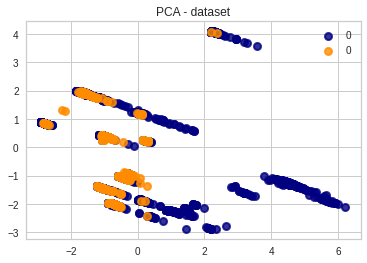

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#iris = datasets.load_iris()

#X = iris.data
#y = iris.target
#target_names = iris.target_names
target_names = y_array

pca = PCA(n_components=8)
X_r = pca.fit(x).transform(x)

#print(y_array)
#print(type(y_array))


# Percentage of variance explained for each components
print(
    "explained variance ratio: %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(
        #X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
        X_r[y_array == i, 0], X_r[y_array == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA - dataset")

plt.show()

In [ ]:
# the histogram of the data
#plt.hist(df['CPU_LOAD_SHORT'], 10, alpha=0.75)

#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(0, 2000)
#plt.ylim(0, 1)
#plt.grid(True)
#plt.show()

In [ ]:
## Divisão em treino e teste:
# Técnica holdout
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, stratify=y, random_state=1)


In [ ]:
x.shape

(4735, 18)

In [ ]:
x_teste.shape
#x_treino

(1421, 18)

In [ ]:
y_teste.shape

(1421, 1)

Contagem de valores únicos na classe de 'Uso total de CPU' :> 0 = Bom / 1 = Ruim


Quantidade de amostras - Classe USO_TOTAL_CPU:
(array([0, 1]), array([3602, 1133]))



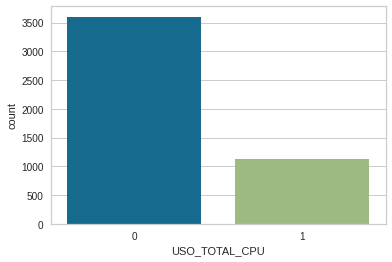

In [ ]:
## Contagem de valores únicos na classe de 'Uso total de CPU' :> 0 = Bom / 1 = Ruim
print("Contagem de valores únicos na classe de 'Uso total de CPU' :> 0 = Bom / 1 = Ruim")
print("")
print("")
print("Quantidade de amostras - Classe USO_TOTAL_CPU:")

print(np.unique(dataset_final['USO_TOTAL_CPU'], return_counts=True))

print("")

sns.countplot(x = dataset_final['USO_TOTAL_CPU']);

Contagem de valores únicos na classe de 'Uso total de CPU' :> 0 = Bom / 1 = Ruim


Quantidade de amostras - Classe PERFORMANCE:
(array([0, 1]), array([2536, 2199]))



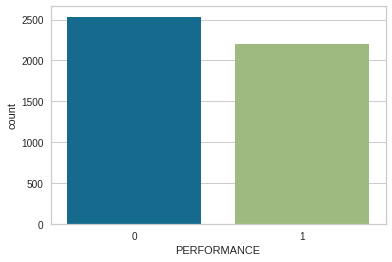

In [ ]:
print("Contagem de valores únicos na classe de 'Uso total de CPU' :> 0 = Bom / 1 = Ruim")
print("")
print("")
print("Quantidade de amostras - Classe PERFORMANCE:")

#print(np.unique(dataset_final['USO_TOTAL_CPU'], return_counts=True))
print(np.unique(dataset_final2['PERFORMANCE'], return_counts=True))
print("")

#sns.countplot(x = dataset_final['USO_TOTAL_CPU']);
sns.countplot(x = dataset_final2['PERFORMANCE']);

In [ ]:
## Gráfico Scatter_Matrix

grafico_matriz = px.scatter_matrix(df, dimensions=['CPU_LOAD_SHORT', 'TAMANHO_DO_BANCO_GB', 'NR_CPU', 'MEMORIA_BD'], color = 'USO_TOTAL_CPU')
grafico_matriz.show()

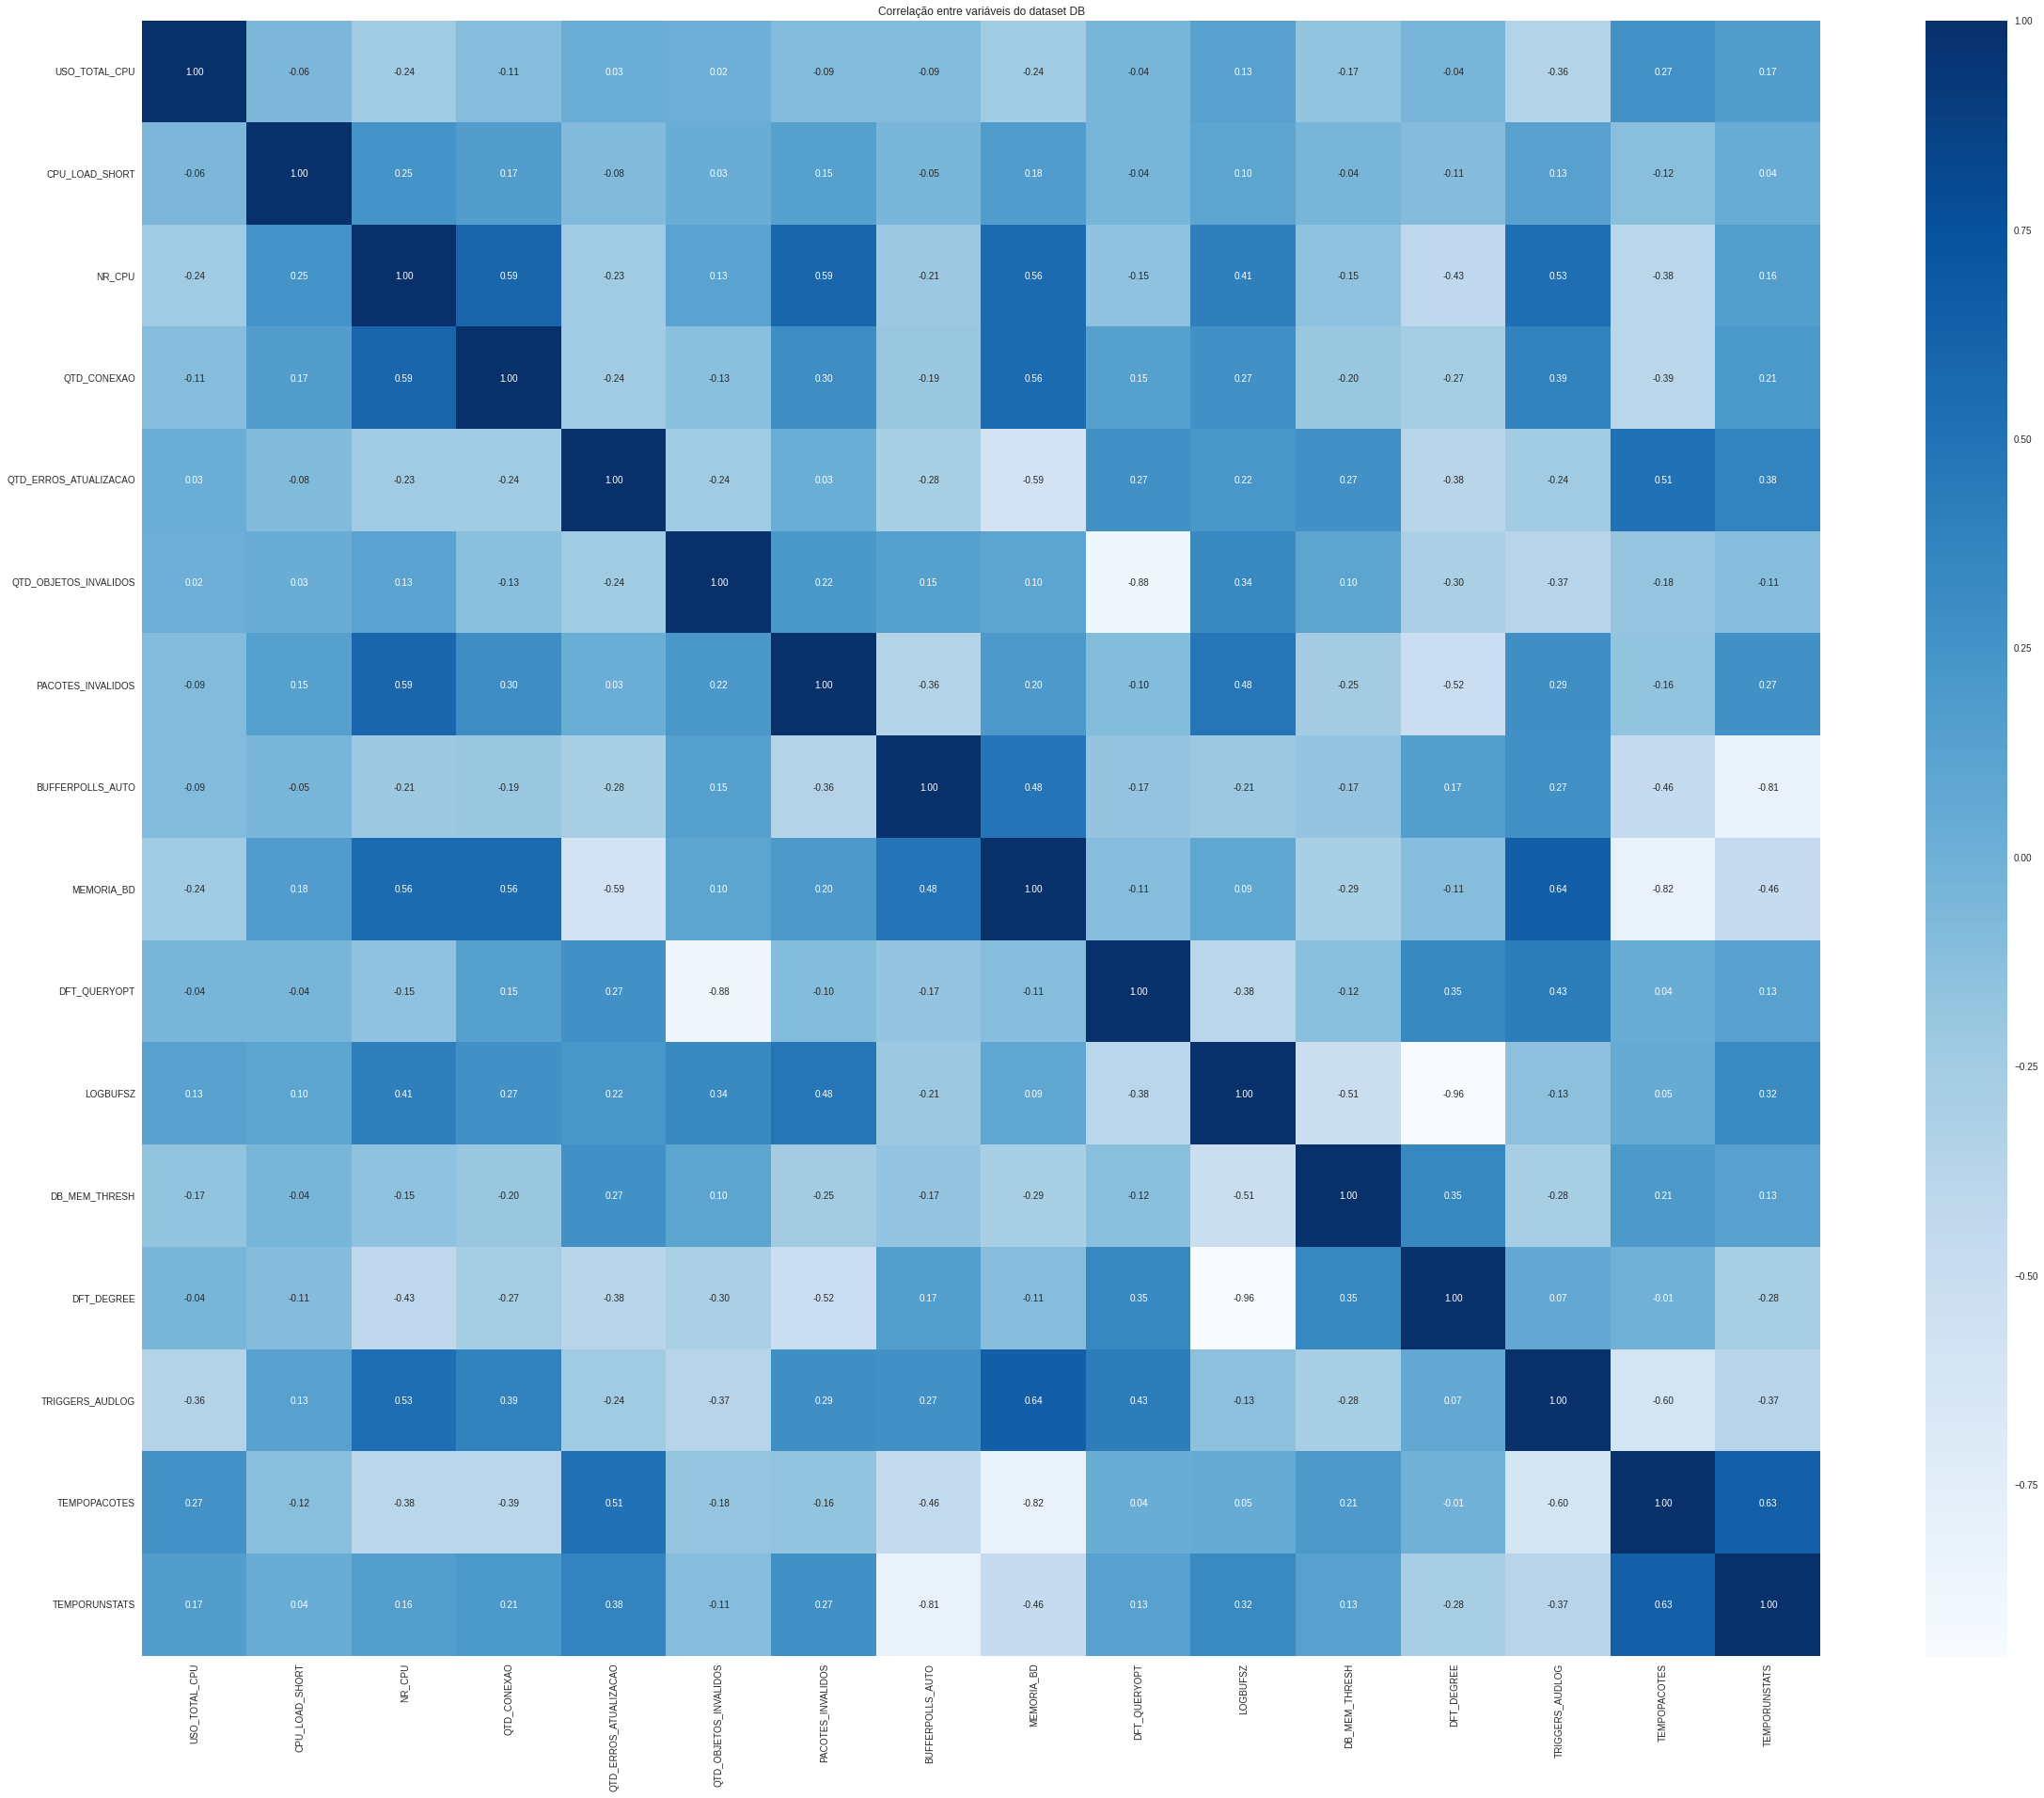

In [ ]:
# Dados para impressão de correlação de valores com base nos valores do dataset completo
# Obs: Entram apenas os valores convertidos

#df_correlac = df[['USO_TOTAL_CPU','CPU_LOAD_SHORT','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','SELF_TUNING_MEM','DFT_DEGREE','TRIGGERS_AUDLOG','BUILD_BANCO','TEMPOPACOTES','TEMPORUNSTATS']]
df_correlac = df[['USO_TOTAL_CPU','CPU_LOAD_SHORT','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','DFT_DEGREE','TRIGGERS_AUDLOG','TEMPOPACOTES','TEMPORUNSTATS']]
## Finalizar ajuste de apresentação**
plt.figure(figsize=(40, 32))
sns.heatmap(df_correlac.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset DB')
plt.show()

In [ ]:
## Verificação de importância de feature, usando árvores de decisão:
import time

feature_names = [f" Atributo {i}" for i in range(x.shape[1])]
#feature_names = [x.shape.feature_names[i] for i in range(x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_treino, y_treino)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tempo gasto para computar a importância de características: {elapsed_time:.3f} segundos")

Tempo gasto para computar a importância de características: 0.024 segundos


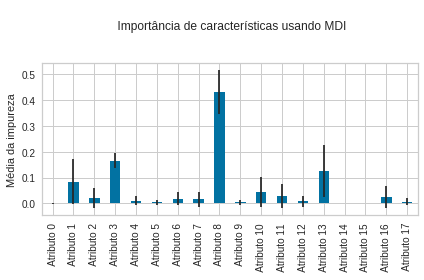

In [ ]:
#dataset_final = df[['USO_TOTAL_CPU','CPU_LOAD_SHORT','TAMANHO_DO_BANCO_GB','NR_CPU','QTD_CONEXAO', 'QTD_ERROS_ATUALIZACAO','QTD_OBJETOS_INVALIDOS', 'PACOTES_INVALIDOS', 'BUFFERPOLLS_AUTO','MEMORIA_BD','DFT_QUERYOPT', 'LOGBUFSZ', 'DB_MEM_THRESH','DFT_DEGREE','TRIGGERS_AUDLOG','INSTANCE_MEMORY','USO_MEMORIA','TEMPOPACOTES','TEMPORUNSTATS']]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("\n Importância de características usando MDI\n\n")
ax.set_ylabel("Média da impureza")
fig.tight_layout()


In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, x_teste, y_teste, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Tempo gasto para computar a importância de características: {elapsed_time:.3f} segundos")

Tempo gasto para computar a importância de características: 10.830 segundos


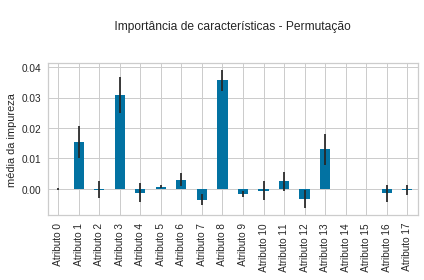

In [ ]:
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("\n Importância de características - Permutação \n\n")
ax.set_ylabel("média da impureza")
fig.tight_layout()
plt.show()

# Etapa de Experimentos, execução de algorítimos.


## Os algoritimos abaixo serão utilizados no projeto:

Naive Bayes

Árvore de Decisão

KNN

Regressão Logística

Random Forest

SVM 

MLP



## <<< Naive Bayes >>>

In [ ]:
## Naive Bayes

naive_load = GaussianNB()
cross_naive = naive_load.fit(x_treino, y_treino)

# Previsores:
previsoes_naive = cross_naive.predict(x_teste)
previsoes_naive

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy_score(y_teste, previsoes_naive)

0.6108374384236454

In [ ]:
## Cross Validation:
score = cross_val_score(cross_naive,x,y, cv=10)
cross_naive.score(x_teste, y_teste)

0.6108374384236454

In [ ]:
x_teste

array([[-0.10740576,  0.84273806, -0.4272791 , ...,  0.        ,
         0.59206581,  0.37581758],
       [-0.10740576, -1.09084048, -0.4272791 , ...,  0.        ,
         0.59206581,  0.37581758],
       [-0.10740576, -0.51076692, -0.4272791 , ...,  0.        ,
         0.59206581,  0.37581758],
       ...,
       [-0.10740576,  1.96421361, -0.4272791 , ...,  0.        ,
         0.59206581,  0.37581758],
       [-0.10740576, -0.54943849, -0.4272791 , ...,  0.        ,
         0.59206581,  0.37581758],
       [-0.10740576, -0.16272278,  2.3403906 , ...,  0.        ,
         0.59206581,  0.37581758]])

In [ ]:
score

array([0.64978903, 0.56540084, 0.58016878, 0.71940928, 0.6350211 ,
       0.61733615, 0.59830867, 0.55602537, 0.58139535, 0.56871036])

Score Naive Bayes:



0.6108374384236454

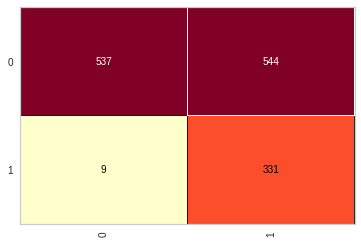

In [ ]:
## Matriz de confusão Naive Bayes:
cm_nb = ConfusionMatrix(naive_load)
cm_nb.fit(x_treino, y_treino)
print('Score Naive Bayes:\n')
cm_nb.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      1081
           1       0.38      0.97      0.54       340

    accuracy                           0.61      1421
   macro avg       0.68      0.74      0.60      1421
weighted avg       0.84      0.61      0.63      1421



In [ ]:
#f1_score(y_teste, previsoes_naive, average='weighted')

In [ ]:
###############################################################
# Aplicação de algoritmo Naive Bayes sem dados de treinamento #
###############################################################

naive_load2 = GaussianNB()
cross_naive2 = naive_load.fit(x_full, y_full)

# Previsores:
previsoes_naive2 = cross_naive.predict(x_full)
previsoes_naive2

print('Resultado de acurácia utilizando o dataset completo: ')
accuracy_score(y_full, previsoes_naive2)

Resultado de acurácia utilizando o dataset completo: 


0.6078141499472017

Score Naive Bayes - dataset completo:



0.6078141499472017

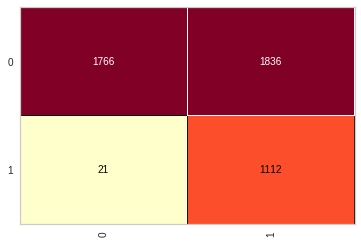

In [ ]:
## Matriz de confusão Naive Bayes - dataset completo:
cm_nb2 = ConfusionMatrix(naive_load2)
cm_nb2.fit(x_full, y_full)
print('Score Naive Bayes - dataset completo:\n')
cm_nb2.score(x_full, y_full)

In [ ]:
#resultado_naive = accuracy_score(y_full, previsoes_naive2)*100
#print(str(resulta_naive) +'%')

In [ ]:
###############################################################
# Aplicação de algoritmo Naive Bayes sem dados de treinamento #
# Classe composta   - y2                                      #
###############################################################

naive_load3 = GaussianNB()
naive3 = naive_load3.fit(x2, y2)

# Previsores:
previsoes_naive3 = naive3.predict(x2)
previsoes_naive3

print('Resultado de acurácia utilizando o dataset completo - Classe Composta: ')
accuracy_score(y2, previsoes_naive3)

Resultado de acurácia utilizando o dataset completo - Classe Composta: 


0.7486800422386484

In [ ]:
#f1_score(y2, previsoes_naive3, average='weighted')

Score Naive Bayes - Dataset completo - Classe composta:



0.7486800422386484

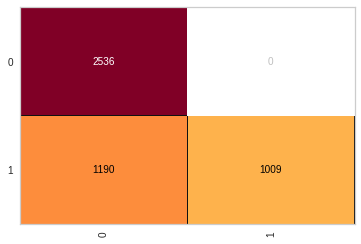

In [ ]:
## Matriz de confusão Naive Bayes - dataset completo - Classe composta:
cm_nb3 = ConfusionMatrix(naive_load3)
cm_nb3.fit(x2, y2)
print('Score Naive Bayes - Dataset completo - Classe composta:\n')
cm_nb3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_naive3))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      2536
           1       1.00      0.46      0.63      2199

    accuracy                           0.75      4735
   macro avg       0.84      0.73      0.72      4735
weighted avg       0.83      0.75      0.73      4735



## <<< Árvore de Decisão >>>




In [ ]:
# Arvore de Decisão:
arvore_load = DecisionTreeClassifier(criterion='entropy', random_state=0)
cross_arvore = arvore_load.fit(x, y) 

[Text(234.97679331718103, 212.71304347826086, 'X[13] <= 0.214\nentropy = 0.794\nsamples = 4735\nvalue = [3602, 1133]'),
 Text(161.23698896782085, 203.2591304347826, 'X[11] <= 1.269\nentropy = 0.944\nsamples = 2864\nvalue = [1827, 1037]'),
 Text(82.8720961140384, 193.80521739130435, 'X[8] <= -0.553\nentropy = 0.987\nsamples = 2356\nvalue = [1337, 1019]'),
 Text(38.739207753105006, 184.3513043478261, 'X[8] <= -0.652\nentropy = 0.846\nsamples = 648\nvalue = [471, 177]'),
 Text(14.286018065487392, 174.89739130434782, 'X[8] <= -0.826\nentropy = 0.947\nsamples = 425\nvalue = [270, 155]'),
 Text(4.284230334964246, 165.44347826086957, 'X[8] <= -0.832\nentropy = 0.991\nsamples = 18\nvalue = [8, 10]'),
 Text(3.2761761385020702, 155.98956521739132, 'X[8] <= -0.841\nentropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(2.268121942039895, 146.53565217391304, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.284230334964246, 146.53565217391304, 'X[8] <= -0.836\nentropy = 0.98\nsamples = 12\nva

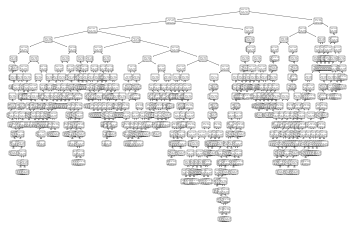

In [ ]:
tree.plot_tree(arvore_load)

In [ ]:
# Previsões da árvore de decisão:
previsoes_arvore = cross_arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
## Resultado de acurácia árvore:
score_arvore = accuracy_score(y_teste, previsoes_arvore)
score_arvore

0.8339197748064743

In [ ]:
## Cross Validation Arvore de Decisão:
score = cross_val_score(cross_arvore,x,y, cv=10)
cross_arvore.score(x_teste, y_teste)

0.8339197748064743

In [ ]:
result_arvore =  cross_arvore.score(x_teste, y_teste)*100
print(str(result_arvore) + '%')

83.39197748064743%


In [ ]:
## Plot decision tree:
plt.figure(figsize=(400,360))
tree.plot_tree(arvore_load, filled=True, feature_names=None)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#plt.savefig("decistion_tree.png")

Score Árvore de Decisão:



0.8339197748064743

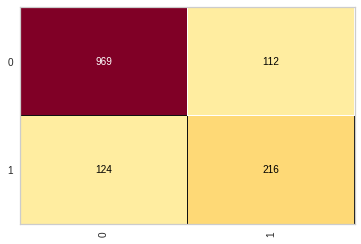

In [ ]:
### Matriz de Árvore de Decisão:
cm_av = ConfusionMatrix(arvore_load)
cm_av.fit(x_treino, y_treino)
print('Score Árvore de Decisão:\n')
cm_av.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1081
           1       0.66      0.64      0.65       340

    accuracy                           0.83      1421
   macro avg       0.77      0.77      0.77      1421
weighted avg       0.83      0.83      0.83      1421



In [ ]:
#f1_score1 = f1_score(y_teste, previsoes_arvore, average='weighted')
f1_score = f1_score(y_teste, previsoes_arvore, average='micro')

f1_score

0.8339197748064744

In [ ]:
#####################################################################
# Aplicação de algoritmo Árvore de Decisão sem dados de treinamento #/
#####################################################################

arvore_load2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
cross_arvore2 = arvore_load2.fit(x_full, y_full)

# Previsores:
previsoes_arvore2 = cross_arvore2.predict(x_full)
previsoes_arvore2

print('Resultado de acurácia utilizando o dataset completo: ')
score_arvore2 = accuracy_score(y_full, previsoes_arvore2)
score_arvore2

Resultado de acurácia utilizando o dataset completo: 


0.8327349524815206

Score Árvore de Decisão - Dataset completo:



0.8327349524815206

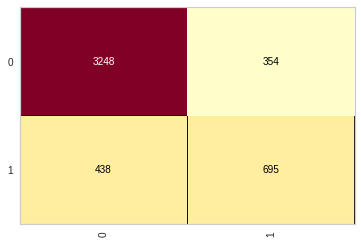

In [ ]:
## Matriz de confusão Árvore de Decisão - dataset completo:
cm_av2 = ConfusionMatrix(arvore_load2)
cm_av2.fit(x_full, y_full)
print('Score Árvore de Decisão - Dataset completo:\n')
cm_av2.score(x_full, y_full)

In [ ]:
result_arvore2 = accuracy_score(y_full, previsoes_arvore2)*100
print(str(result_arvore2) + '%')

83.27349524815206%


In [ ]:
#####################################################################
# Aplicação de algoritmo Árvore de Decisão sem dados de treinamento #
# Classe composta - y2                                              #
#####################################################################

arvore_load3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
cross_arvore3 = arvore_load3.fit(x2, y2)

# Previsores:
previsoes_arvore3 = cross_arvore3.predict(x2)
previsoes_arvore3

print('Resultado de acurácia utilizando o dataset completo - Classe composta: ')
score_arvore3 = accuracy_score(y2, previsoes_arvore3)
score_arvore3

Resultado de acurácia utilizando o dataset completo - Classe composta: 


0.9917634635691658

Score Árvore de Decisão - Dataset completo - Classe composta:



0.9917634635691658

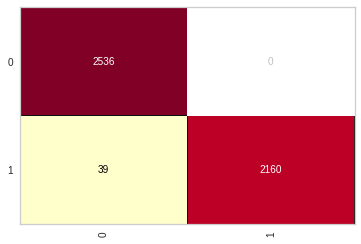

In [ ]:
## Matriz de confusão Naive Bayes - dataset completo - Classe composta:
cm_av3 = ConfusionMatrix(arvore_load3)
cm_av3.fit(x2, y2)
print('Score Árvore de Decisão - Dataset completo - Classe composta:\n')
cm_av3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_arvore3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2536
           1       1.00      0.98      0.99      2199

    accuracy                           0.99      4735
   macro avg       0.99      0.99      0.99      4735
weighted avg       0.99      0.99      0.99      4735



## <<< KNN >>>

In [ ]:
## Implementação KNN:
load_knn = KNeighborsClassifier(n_neighbors=8)
load_knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
previsoes_knn = load_knn.predict(x_teste)
previsoes_knn

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
## Resultado de acurácia KNN:
score_knn = accuracy_score(y_teste, previsoes_knn)
score_knn

0.7762139338494018

In [ ]:
## Cross Validation KNN:
cross_knn = load_knn.fit(x_treino, y_treino)

previsoes_cross_knn = cross_knn.predict(x_teste)
previsoes_cross_knn

accuracy_cross_knn = accuracy_score(y_teste, previsoes_cross_knn)

score_cross_knn = cross_val_score(cross_knn, x,y, cv=10)

cross_knn.score(x_teste, y_teste)

score_cross_knn

array([0.76160338, 0.72362869, 0.75316456, 0.79746835, 0.7721519 ,
       0.75052854, 0.8012685 , 0.75687104, 0.74841438, 0.72727273])

Score KNN:



0.7762139338494018

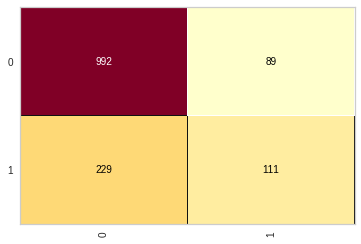

In [ ]:
## Matriz de Confusão Knn:
cm_knn = ConfusionMatrix(load_knn)
cm_knn.fit(x_treino, y_treino)
print('Score KNN:\n')
cm_knn.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1081
           1       0.56      0.33      0.41       340

    accuracy                           0.78      1421
   macro avg       0.68      0.62      0.64      1421
weighted avg       0.75      0.78      0.75      1421



In [ ]:
#####################################################################
# Aplicação de algoritmo KNN sem dados de treinamento #
#####################################################################
load_knn2 = KNeighborsClassifier(n_neighbors=8)
load_knn2.fit(x_full, y_full)

# Previsores:
previsoes_knn2 = load_knn2.predict(x_full)
previsoes_knn2

print('Resultado de acurácia utilizando o dataset completo: ')
score_knn2 = accuracy_score(y_full, previsoes_knn2)
score_knn2

Resultado de acurácia utilizando o dataset completo: 


0.8031678986272439

Score KNN - Dataset completo:



0.8031678986272439

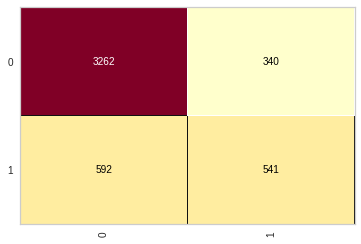

In [ ]:
## Matriz de Confusão Knn - Dataset completo:
cm_knn2 = ConfusionMatrix(load_knn2)
cm_knn2.fit(x_full, y_full)
print('Score KNN - Dataset completo:\n')
cm_knn2.score(x_full, y_full)

In [ ]:
#####################################################################
# Aplicação de algoritmo KNN sem dados de treinamento               #
# Classe composta - y2                                              #
#####################################################################
load_knn3 = KNeighborsClassifier(n_neighbors=8)
load_knn3.fit(x2, y2)

# Previsores:
previsoes_knn3 = load_knn3.predict(x2)
previsoes_knn3

print('Resultado de acurácia utilizando o dataset completo - Classe composta: ')
score_knn3 = accuracy_score(y2, previsoes_knn3)
score_knn3

Resultado de acurácia utilizando o dataset completo - Classe composta: 


0.9885955649419219

In [ ]:
## Matriz de Confusão Knn - Dataset completo - Classe composta:
cm_knn3 = ConfusionMatrix(load_knn3)
cm_knn3.fit(x2, y2)
print('Score KNN - Dataset completo - Classe composta:\n')
cm_knn3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_knn3))

## <<< Regressão Logística >>>

In [ ]:
## Implementação de Regressão Logpistica:
logistic_regres = LogisticRegression(random_state=1)
logistic_regres.fit(x_treino, y_treino)

In [ ]:
## Previsões Regressão:
previsoes_logistic = logistic_regres.predict(x_teste)
previsoes_logistic

In [ ]:
## Resultado de acurácia:
score_logistic = accuracy_score(y_teste, previsoes_logistic)
score_logistic

In [ ]:
## Cross Validation Logistic Regression:
cross_lr = load_knn.fit(x_treino, y_treino)

previsoes_cross_lr = cross_lr.predict(x_teste)
previsoes_cross_lr

accuracy_cross_lr = accuracy_score(y_teste, previsoes_cross_lr)

score_cross_lr = cross_val_score(cross_lr, x,y, cv=10)

cross_lr.score(x_teste, y_teste)

score_cross_lr

In [ ]:
## Matriz de Confusão LR:
cm_lr = ConfusionMatrix(logistic_regres)
cm_lr.fit(x_treino, y_treino)
print('Score LR:\n')
cm_lr.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_logistic))

In [ ]:
#######################################################################
# Aplicação de algoritmo Regressão Logística sem dados de treinamento #
#######################################################################
logistic_regres2 = LogisticRegression(random_state=1)
logistic_regres2.fit(x_full, y_full)

# Previsores:
previsoes_logistic2 = logistic_regres2.predict(x_full)
previsoes_logistic2

print('Resultado de acurácia utilizando o dataset completo: ')
score_logistic2 = accuracy_score(y_full, previsoes_logistic2)
score_logistic2

In [ ]:
## Matriz de Confusão LR:
cm_lr2 = ConfusionMatrix(logistic_regres2)
cm_lr2.fit(x_full, y_full)
print('Score Regressão Logística - Dataset completo:\n')
cm_lr2.score(x_full, y_full)

In [ ]:
#######################################################################
# Aplicação de algoritmo Regressão Logística sem dados de treinamento #
# Classe composta - y2                                                #
#######################################################################
logistic_regres3 = LogisticRegression(random_state=1)
logistic_regres3.fit(x2, y2)

# Previsores:
previsoes_logistic3 = logistic_regres3.predict(x2)
previsoes_logistic3

print('Resultado de acurácia utilizando o dataset completo - Classe composta: ')
score_logistic3 = accuracy_score(y2, previsoes_logistic3)
score_logistic3

In [ ]:
## Matriz de Confusão LR - Classe composta:
cm_lr3 = ConfusionMatrix(logistic_regres3)
cm_lr3.fit(x2, y2)
print('Score Regressão Logística - Dataset completo - Classe composta:\n')
cm_lr3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_logistic3))

## <<< Randon Forest >>>

In [ ]:
##
load_random_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=0)
load_random_forest.fit(x_treino, y_treino)

In [ ]:
previsoes_random_forest = load_random_forest.predict(x_teste)
previsoes_random_forest

In [ ]:
score_random_forest = accuracy_score(y_teste, previsoes_random_forest)
score_random_forest

In [ ]:
## Cross Validation Random Forest:
cross_rf = load_random_forest.fit(x_treino, y_treino)

previsoes_cross_rf = cross_rf.predict(x_teste)
previsoes_cross_rf

accuracy_cross_rf = accuracy_score(y_teste, previsoes_cross_rf)

score_cross_rf = cross_val_score(cross_rf, x,y, cv=12)

cross_rf.score(x_teste, y_teste)

score_cross_rf

In [ ]:
## Matriz de Confusão RF:
cm_rf = ConfusionMatrix(load_random_forest)
cm_rf.fit(x_treino, y_treino)
print('Score RF:\n')
cm_rf.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_random_forest))

In [ ]:
#######################################################################
# Aplicação de algoritmo Random Forest sem dados de treinamento #
#######################################################################
load_random_forest2 = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)
load_random_forest2.fit(x_full, y_full)

# Previsores:
previsoes_random_forest2 = load_random_forest2.predict(x_full)
previsoes_random_forest2

print('Resultado de acurácia utilizando o dataset completo: ')
score_random_forest2 = accuracy_score(y_full, previsoes_random_forest2)
score_random_forest2

In [ ]:
## Matriz de Confusão RF - Dataset completo:
cm_rf2 = ConfusionMatrix(load_random_forest2)
cm_rf2.fit(x_full, y_full)
print('Score RF - Dataset completo:\n')
cm_rf2.score(x_full, y_full)

In [ ]:
#### Redução de dimensionalidade -  PCA no Random Forest:
#### Utilizando treino e teste
pca = PCA(n_components=10)
x_treino_pca = pca.fit_transform(x_treino)
x_teste_pca = pca.transform(x_teste)

## Validação de variância de acerto dos dados:
pca.explained_variance_ratio_


In [ ]:
# Treinamento  PCA usando Random Forest:
rf_pca = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)
rf_pca.fit(x_treino_pca, y_treino)

In [ ]:
#Previsões RF/PCA
previsoes_rf_pca = rf_pca.predict(x_teste_pca)
#previsoes_mlp_pca

# Acurácia RF/PCA
print('Score RF/PCA:\n')
accuracy_score(y_teste, previsoes_rf_pca)

In [ ]:
#######################################################################
# Aplicação de algoritmo Random Forest sem dados de treinamento #
# Classe composta - y2                                          #
#######################################################################
load_random_forest3 = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)
load_random_forest3.fit(x2, y2)

# Previsores:
previsoes_random_forest3 = load_random_forest3.predict(x2)
previsoes_random_forest3

print('Resultado de acurácia utilizando o dataset completo: ')
score_random_forest3 = accuracy_score(y2, previsoes_random_forest3)
score_random_forest3

In [ ]:
## Matriz de Confusão RF - Dataset completo - Classe composta:
cm_rf3 = ConfusionMatrix(load_random_forest3)
cm_rf3.fit(x2, y2)
print('Score RF - Dataset completo - Classe composta:\n')
cm_rf3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_random_forest3))

In [ ]:
#Fonte:  https://chrisalbon.com/code/machine_learning/model_evaluation/plot_the_validation_curve/
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 150, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             x,
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## <<< Support Vector Machines (SVM) >>>

In [ ]:
## 
load_svm = SVC(kernel='linear', random_state=1)
load_svm.fit(x_treino, y_treino)

In [ ]:
previsoes_svm = load_svm.predict(x_teste)
previsoes_svm

In [ ]:
score_svm = accuracy_score(y_teste, previsoes_svm)
score_svm

In [ ]:
## Cross Validation SVM:
cross_svm = load_svm.fit(x_treino, y_treino)

previsoes_cross_svm = cross_svm.predict(x_teste)
previsoes_cross_svm

accuracy_cross_svm = accuracy_score(y_teste, previsoes_cross_svm)

score_cross_svm = cross_val_score(cross_svm, x,y, cv=12)

cross_svm.score(x_teste, y_teste)

score_cross_svm

In [ ]:
## Matriz de Confusão SVM:
cm_svm = ConfusionMatrix(load_svm)
cm_svm.fit(x_treino, y_treino)
print('Score SVM:\n')
cm_svm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_svm))

In [ ]:
#######################################################################
# Aplicação de algoritmo SVM sem dados de treinamento #
#######################################################################
load_svm2 = SVC(kernel='linear', random_state=1)
load_svm2.fit(x_full, y_full)

# Previsores:
previsoes_svm2 = load_svm2.predict(x_full)
previsoes_svm2

print('Resultado de acurácia utilizando o dataset completo: ')
score_svm2 = accuracy_score(y_full, previsoes_svm2)
score_svm2

In [ ]:
## Matriz de Confusão SVM - Dataset completo:
cm_svm2 = ConfusionMatrix(load_svm2)
cm_svm2.fit(x_full, y_full)
print('Score SVM - Dataset completo:\n')
cm_svm2.score(x_full, y_full)

In [ ]:
#######################################################################
# Aplicação de algoritmo SVM sem dados de treinamento #
# Classe composta - y2                                                # 
#######################################################################
load_svm3 = SVC(kernel='linear', random_state=1)
load_svm3.fit(x2, y2)

# Previsores:
previsoes_svm3 = load_svm3.predict(x2)
previsoes_svm3

print('Resultado de acurácia utilizando o dataset completo: ')
score_svm3 = accuracy_score(y2, previsoes_svm3)
score_svm3

In [ ]:
## Matriz de Confusão SVM - Dataset completo - Classe composta:
cm_svm3 = ConfusionMatrix(load_svm3)
cm_svm3.fit(x2, y2)
print('Score SVM - Dataset completo:\n')
cm_svm3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_svm3))

## <<< MLP >>>

In [ ]:
x_treino.shape

(20+1) /2

In [ ]:
#Treinamento: 
load_mlp = MLPClassifier( hidden_layer_sizes=(10,5), solver='sgd', verbose=True, max_iter=500, tol=0.000010, random_state=0)
load_mlp.fit(x_treino, y_treino)

In [ ]:
previsoes_mlp = load_mlp.predict(x_teste)
previsoes_mlp

In [ ]:
score_mlp = accuracy_score(y_teste, previsoes_mlp)
score_mlp

In [ ]:
load_mlp.score(x_teste,y_teste)

In [ ]:
#Cross validation - MLP:

cross_mlp = load_mlp.fit(x_treino, y_treino)

previsoes_cross_mlp = cross_mlp.predict(x_teste)
previsoes_cross_mlp

accuracy_cross_mlp = accuracy_score(y_teste, previsoes_cross_mlp)


score_cross_mlp = cross_val_score(cross_mlp, x,y, cv=10)

cross_mlp.score(x_teste, y_teste)

score_cross_mlp

In [ ]:
## Matriz de Confusão MLP:
cm_mlp = ConfusionMatrix(load_mlp)
cm_mlp.fit(x_treino, y_treino)
print('Score MLP:\n')
cm_mlp.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_mlp))

In [ ]:
#######################################################################
# Aplicação de algoritmo MLP sem dados de treinamento #
#######################################################################
load_mlp2 = MLPClassifier(hidden_layer_sizes=(10,5), solver='sgd', verbose=True, max_iter=500, tol=0.000010, random_state=0)
load_mlp2.fit(x_full, y_full)

# Previsores:
previsoes_mlp2 = load_mlp2.predict(x_full)
previsoes_mlp2

print('Resultado de acurácia utilizando o dataset completo: ')
score_mlp2 = accuracy_score(y_full, previsoes_mlp2)
score_mlp2

In [ ]:
## Matriz de Confusão MLP:
cm_mlp2 = ConfusionMatrix(load_mlp2)
cm_mlp2.fit(x_full, y_full)
print('Score MLP - Dataset completo:\n')
cm_mlp2.score(x_full, y_full)

In [ ]:
#### Redução de dimensionalidade -  PCA no MLP:
#### Utilizando treino e teste
#pca = PCA(n_components=8)
# Teste:
x_treino_pca = pca.fit_transform(x_treino)
x_teste_pca = pca.transform(x_teste)

## Validação de variância de acerto dos dados:
pca.explained_variance_ratio_

In [ ]:
## Soma de validação de variância de acerto dos dados:
pca.explained_variance_ratio_.sum()

In [ ]:
# Treinamento  PCA usando MLP:
mlp_pca = MLPClassifier(hidden_layer_sizes=(10,5), solver='sgd', verbose=True, max_iter=500, tol=0.000010, random_state=0)
mlp_pca.fit(x_treino_pca, y_treino)

In [ ]:
previsoes_mlp_pca = mlp_pca.predict(x_teste_pca)
#previsoes_mlp_pca

print('Score MLP/PCA:\n')
accuracy_score(y_teste, previsoes_mlp_pca)

In [ ]:
#######################################################################
# Aplicação de algoritmo MLP sem dados de treinamento #
# Classe composta - y2
#######################################################################
load_mlp3 = MLPClassifier(hidden_layer_sizes=(10,5), solver='sgd', verbose=True, max_iter=1000, tol=0.000010, random_state=0)
load_mlp3.fit(x2, y2)

# Previsores:
previsoes_mlp3 = load_mlp3.predict(x2)
previsoes_mlp3

print('Resultado de acurácia utilizando o dataset completo - Classe composta: ')
score_mlp3 = accuracy_score(y2, previsoes_mlp3)
score_mlp3

In [ ]:
## Matriz de Confusão MLP - Classe composta:
cm_mlp3 = ConfusionMatrix(load_mlp3)
cm_mlp3.fit(x2, y2)
print('Score MLP - Dataset completo - Classe composta:\n')
cm_mlp3.score(x2, y2)

In [ ]:
print(classification_report(y2, previsoes_mlp3))

## Resultado Gerais dos modelos

In [ ]:
# Recall_score:

print("Naive Bayes: ", balanced_accuracy_score(y2, previsoes_naive3), "\n",
      "Árvore Decisão: ",balanced_accuracy_score(y2, previsoes_arvore3), "\n",
      "KNN: ",balanced_accuracy_score(y2, previsoes_knn3), "\n",
      "Regressão Logística: ",balanced_accuracy_score(y2, previsoes_logistic3), "\n",
      "Random Forest: ",balanced_accuracy_score(y2, previsoes_random_forest3), "\n",
      "SVM: ",balanced_accuracy_score(y2, previsoes_svm3), "\n",
      "MLP: ",balanced_accuracy_score(y2, previsoes_mlp3))
